<img style="border:10px solid blue" src="imgs/header.png">

<div style="border:10px solid blue">
<h1><center>TEAM</center></h1>
<h2><center>Fallou DIAKHATE</center></h2>
<h2><center>Faty GUEYE </center></h2>
</div>

 ## `IMPORTATION DES LIBRAIRIES`

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## `Lecture du fichier CSV`

Dans cette première partie du code nous avons utilisé la bibliothèque pandas de python pour faire une lecture du fichier final.csv qu'on a obtenue suite à notre simulation


In [3]:
simulation_data = pd.read_csv("Data/final.csv")

## `EXPLORATION ET EXPLOITATION DES DONNEES`

In [4]:
simulation_data.head()

,CustomerType,ArrivalTime,RVector,QueueSize,LES,NbAgents,WaitingTime
0,30175,29001.0,0,0,0.0,78,1.0
1,30560,29077.0,0,0,0.0,64,1.0
2,30175,29287.0,0,0,1.0,78,1.0
3,30175,29358.0,0,0,1.0,78,1.0
4,30175,29350.0,0,0,1.0,78,1.0


In [10]:
simulation_data.describe()

,CustomerType,ArrivalTime,RVector,QueueSize,LES,NbAgents,WaitingTime
count,1.462901e+06,1.462901e+06,1.462901e+06,1.462901e+06,1.462901e+06,1.462901e+06,1.462901e+06
mean,3.026659e+04,4.553522e+04,5.719347e+00,1.783729e+00,3.666904e+01,7.700996e+01,3.940482e+01
std,1.668257e+02,8.987370e+03,1.301327e+01,4.435977e+00,7.736276e+01,2.061980e+01,7.995670e+01
min,3.006600e+04,2.735000e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,3.017500e+04,3.801900e+04,0.000000e+00,0.000000e+00,1.000000e+00,6.400000e+01,1.000000e+00
50%,3.017500e+04,4.486200e+04,0.000000e+00,0.000000e+00,1.000000e+00,7.900000e+01,1.000000e+00
75%,3.024100e+04,5.256900e+04,5.000000e+00,1.000000e+00,3.400000e+01,9.300000e+01,4.100000e+01
max,3.076400e+04,7.198400e+04,1.410000e+02,6.000000e+01,1.479000e+03,1.210000e+02,1.495000e+03


In [5]:
print("SHAPE DES DONNEES DE SIMULATION >>>>>>>>>>>> "+str(simulation_data.shape))

SHAPE DES DONNEES DE SIMULATION >>>>>>>>>>>> (1462901, 7)


In [6]:
print("LES VARIABLES DES DONNEES DE SIMULATION \n\n"+str(simulation_data.keys()))

LES VARIABLES DES DONNEES DE SIMULATION 

Index(['CustomerType', 'ArrivalTime', 'RVector', 'QueueSize', 'LES',
       'NbAgents', 'WaitingTime'],
      dtype='object')


* CustomerType : 
* ArrivalTime : 
* RVector :
* QueueSize :
* LES :
* NbAgents :
* WaitingTime :

## `VISUALISATION DES DONNEES`

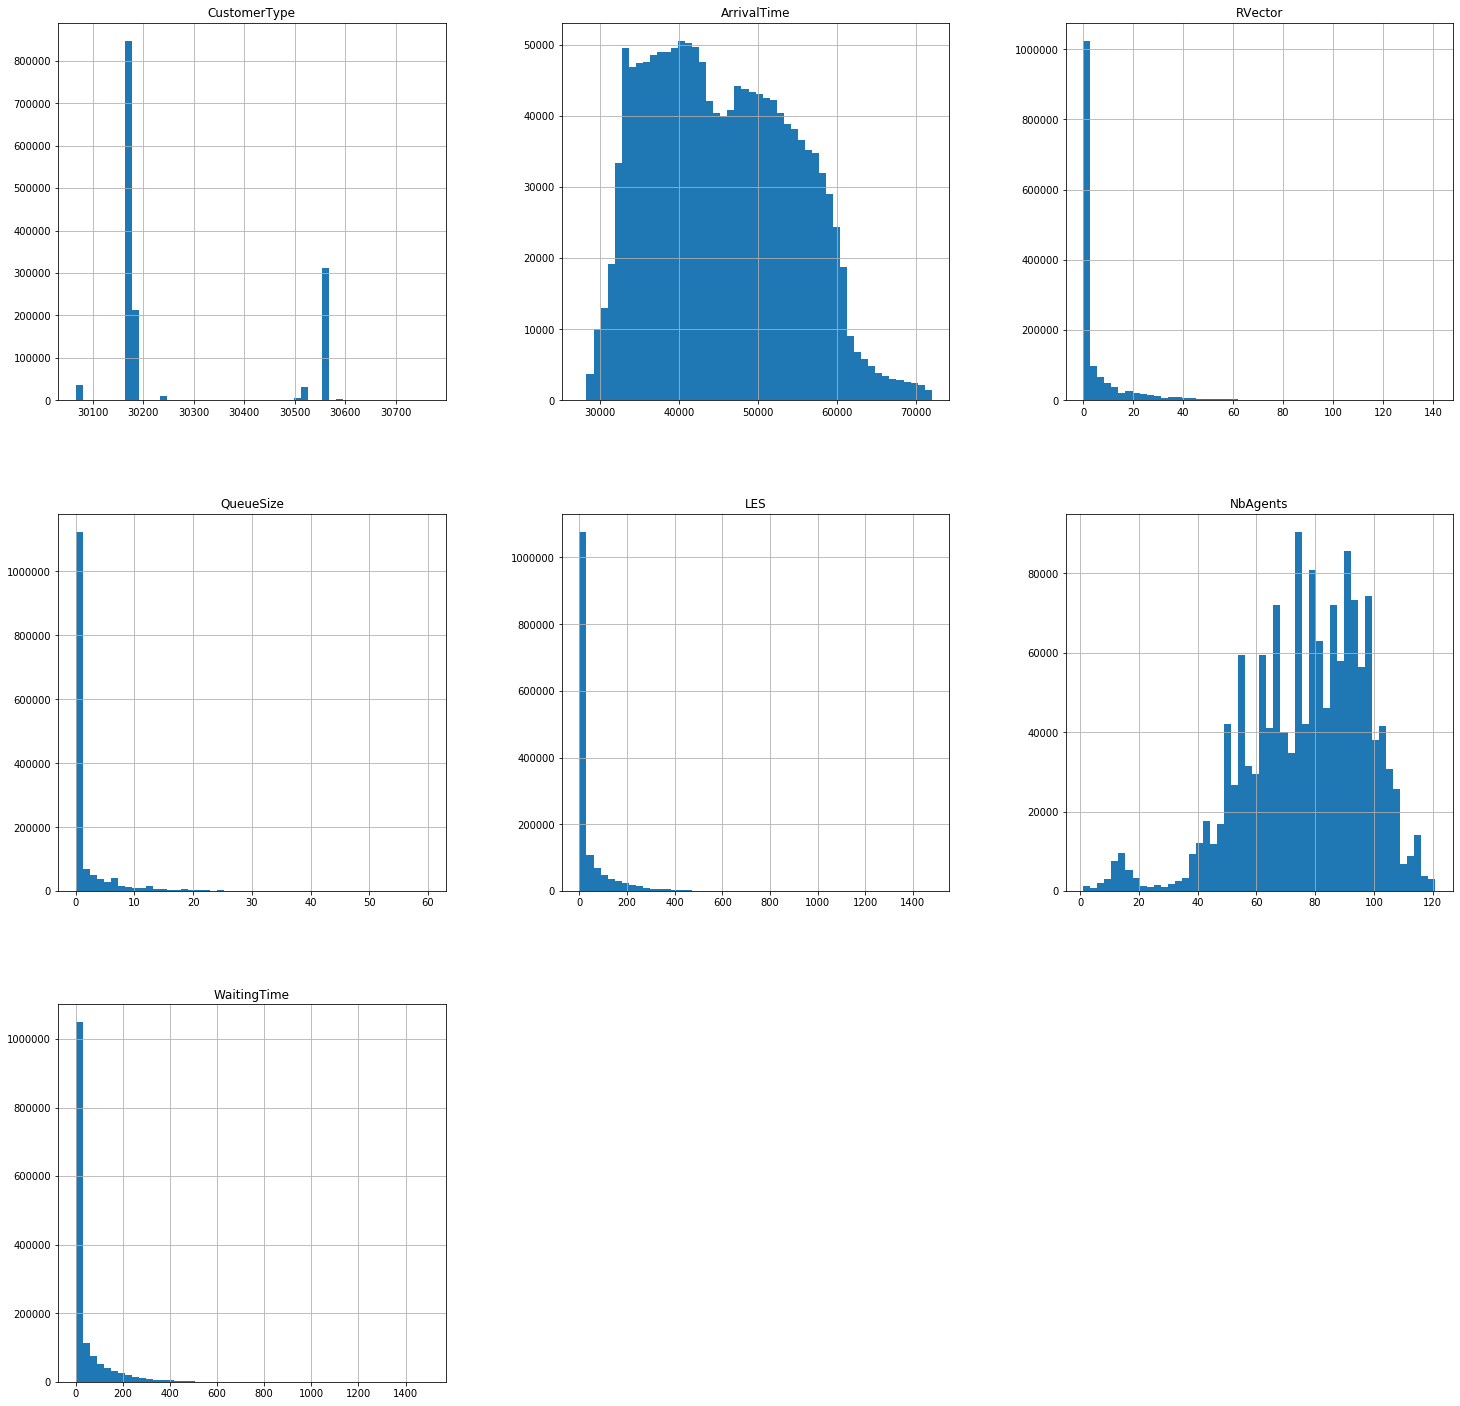

In [8]:
simulation_data.hist(bins=50, figsize=(25,25))
plt.show()

## `TABLEAU DE CORRELATION`

In [12]:
simulation_data.corr()

,CustomerType,ArrivalTime,RVector,QueueSize,LES,NbAgents,WaitingTime
CustomerType,1.000000,0.002991,0.015177,-0.037756,0.009944,-0.291312,0.013598
ArrivalTime,0.002991,1.000000,-0.019300,-0.003412,0.105540,-0.040552,0.111985
RVector,0.015177,-0.019300,1.000000,0.816143,0.839384,0.074306,0.844659
QueueSize,-0.037756,-0.003412,0.816143,1.000000,0.748798,0.171761,0.750172
LES,0.009944,0.105540,0.839384,0.748798,1.000000,0.020913,0.915783
NbAgents,-0.291312,-0.040552,0.074306,0.171761,0.020913,1.000000,0.013360
WaitingTime,0.013598,0.111985,0.844659,0.750172,0.915783,0.013360,1.000000


## `SEGMENTATION DES DONNEES DE SIMULATION EN DONNEES DE TEST ET DE SIMULATION`

In [13]:
Y = np.array(simulation_data['WaitingTime'])

In [14]:
X = np.array(simulation_data.drop('WaitingTime', axis = 1))

In [15]:
X_train , X_test, Y_train, Y_test = train_test_split (X, Y, random_state =0 ,train_size =0.2)

In [16]:
print('Training Features Shape >>>>>>>>>>>> ', X_train.shape)
print('Training Labels Shape >>>>>>>>>>>> ', Y_train.shape)
print('Testing Features Shape >>>>>>>>>>>> ', X_test.shape)
print('Testing Labels Shape >>>>>>>>>>>> ', Y_test.shape)

Training Features Shape >>>>>>>>>>>>  (292580, 6)
Training Labels Shape >>>>>>>>>>>>  (292580,)
Testing Features Shape >>>>>>>>>>>>  (1170321, 6)
Testing Labels Shape >>>>>>>>>>>>  (1170321,)


## `ENTRAINEMENT DU PREDICATEUR`

In [62]:
predicteur = RandomForestRegressor(n_estimators=2)
predicteur.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

## `LES MESURES DE PERFORMANCES DU PREDICATEUR`

* LES SCORES

In [27]:
training_score = predicteur.score(X_train, Y_train)
print("Training Score Du Predicteur >>>>>>>> "+str(training_score))

Training Score Du Predicteur >>>>>>>> 0.960556072857555


In [38]:
Y_test.reshape(1, -1)

array([[1., 1., 0., ..., 1., 1., 1.]])

In [57]:
test_score = predicteur.score(X_test, Y_test)
print("Test Score Du Predicteur >>>>>>>> "+str(test_score))

Test Score Du Predicteur >>>>>>>> 0.8691253490284996


* MSE

In [64]:
Y_predict = predicteur.predict(X_test)
mse = mean_squared_error(Y_test, Y_predict)
print("MSE >>>>>>>> "+str(mse))

MSE >>>>>>>> 833.1170451386218


## `AMELIORATION DU MODELE`

* SCORE

In [54]:
best_predicteur = RandomForestRegressor(n_estimators=50)
best_predicteur.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
training_score = best_predicteur.score(X_train, Y_train)
print("Training Score Du Predicteur >>>>>>>> "+str(training_score))

Training Score Du Predicteur >>>>>>>> 0.9873683078402364


In [59]:
test_score = best_predicteur.score(X_test, Y_test)
print("Test Score Du Predicteur >>>>>>>> "+str(test_score))

Test Score Du Predicteur >>>>>>>> 0.9134614319683326


* MSE

In [66]:
Y_predict = best_predicteur.predict(X_test)
mse = mean_squared_error(Y_test, Y_predict)
print("MSE >>>>>>>> "+str(mse))

MSE >>>>>>>> 552.794076138522
